In [ ]:
%matplotlib inline

# 0008_Random walker segmentation using Scikit-Image 

# - 1000 days of Python 

## Setup working directory

In [2]:
pwd

'D:\\desktop\\Python\\1000 days of python'

In [3]:
cd reference\digitalSreeni\python_for_microscopists-master

D:\desktop\Python\1000 days of python\reference\digitalSreeni\python_for_microscopists-master


In [4]:
pwd

'D:\\desktop\\Python\\1000 days of python\\reference\\digitalSreeni\\python_for_microscopists-master'

In [5]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np

## Input Image

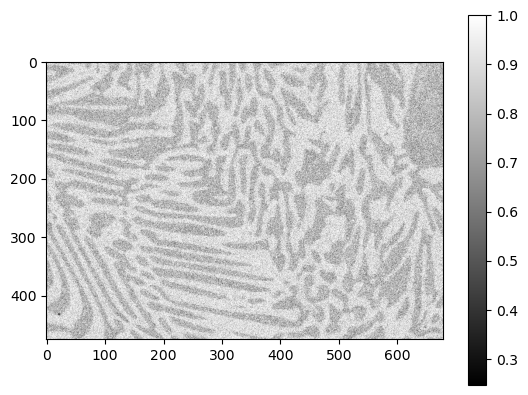

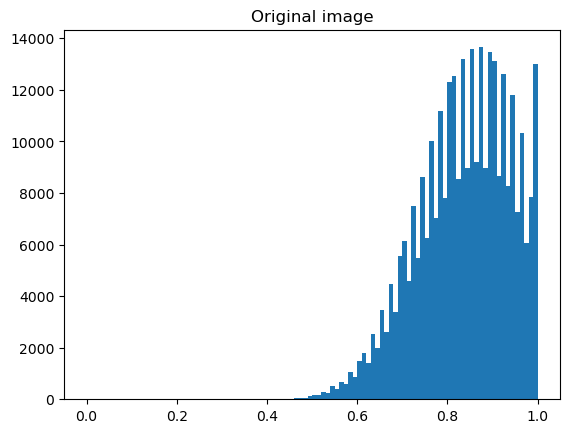

In [6]:
img = img_as_float(io.imread("images/Alloy_noisy.jpg"))

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(img.flat, bins=100, range=(0, 1)) 
plt.title('Original image')

plt.show()
# Very noisy image so histogram looks horrible. Let us denoise and see if it helps.

## Denoising using skit image (skimage)

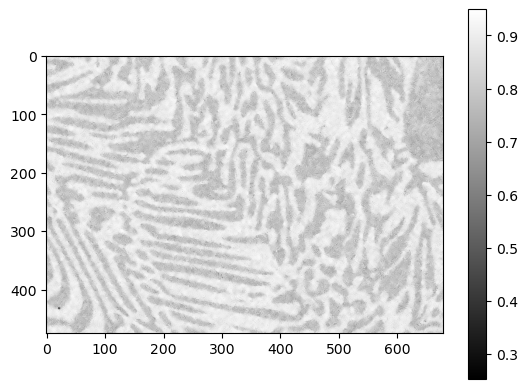

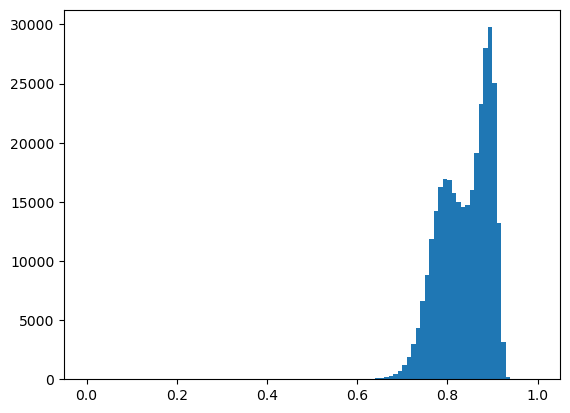

In [7]:
from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
plt.imshow(denoise_img, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(denoise_img.flat, bins=100, range=(0, 1)) 
plt.show()
# Much better histogram and now we can see two separate peaks. 
#Still close enough so cannot use histogram based segmentation.
#Let us see if we can get any better by some preprocessing.

## Histogram equalization using skimage

### Method 1: exposure.equalize_hist (too much)

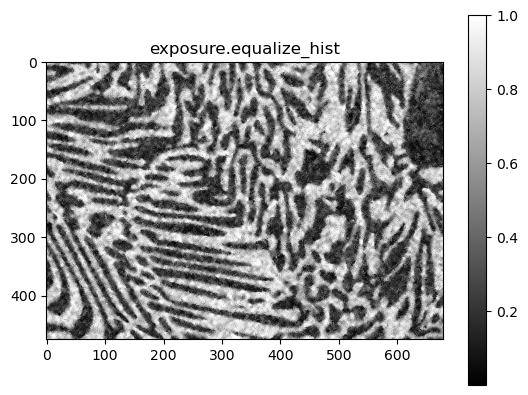

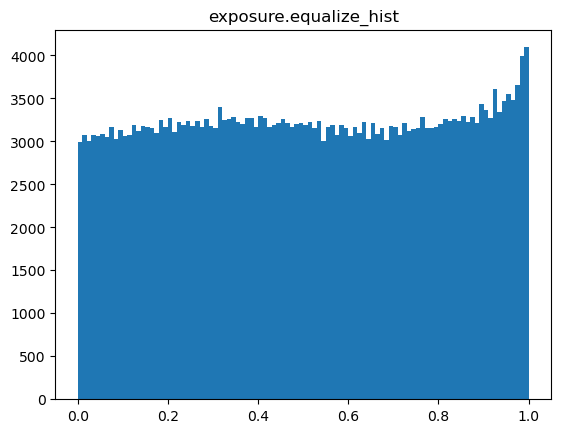

In [8]:
#Let's try histogram equalization
from skimage import exposure   #Contains functions for hist. equalization

eq_img = exposure.equalize_hist(denoise_img)
# eq_img = exposure.equalize_adapthist(denoise_img)
plt.imshow(eq_img, cmap='gray')
plt.colorbar()
plt.title('exposure.equalize_hist')
plt.show()
plt.hist(eq_img.flat, bins=100, range=(0., 1))
plt.title('exposure.equalize_hist')
plt.show()

### Method 2

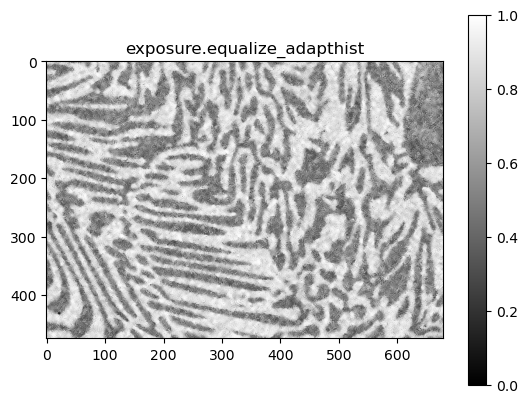

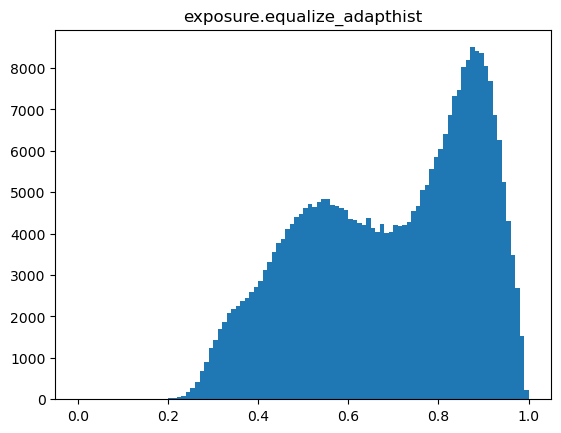

In [9]:
#Let's try histogram equalization
from skimage import exposure   #Contains functions for hist. equalization

#eq_img = exposure.equalize_hist(denoise_img)
eq_img = exposure.equalize_adapthist(denoise_img)
plt.imshow(eq_img, cmap='gray')
plt.title('exposure.equalize_adapthist')
plt.colorbar()
plt.show()
plt.hist(eq_img.flat, bins=100, range=(0., 1))
plt.title('exposure.equalize_adapthist')
plt.show()

In [ ]:
#Not any better. Let us stretch the hoistogram between 0.7 and 0.95

### Define some markers for segmentation

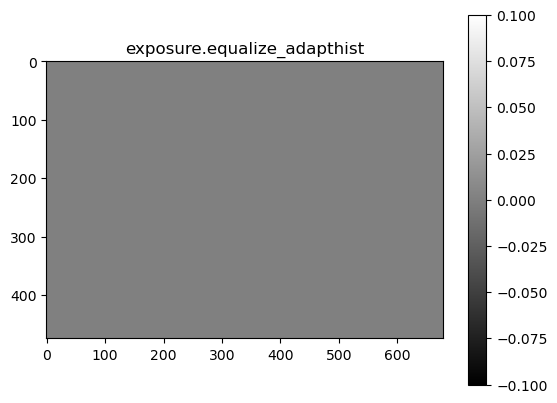

In [10]:
#Define some markers for segmentation
# The range of the binary image spans over (0, 1).

# For markers, let us include all between each peak.
#New array with the same size
markers = np.zeros(img.shape, dtype=np.uint)
plt.imshow(markers, cmap='gray')
plt.title('exposure.equalize_adapthist')
plt.colorbar()
plt.show()

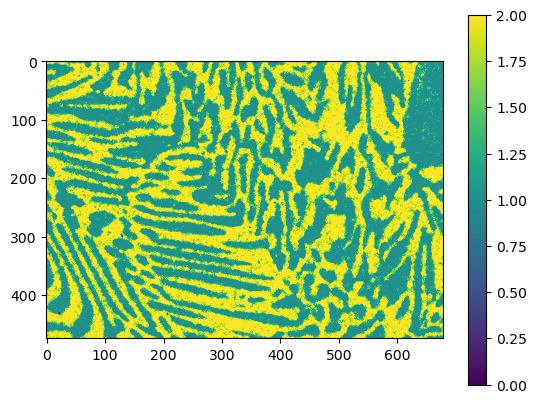

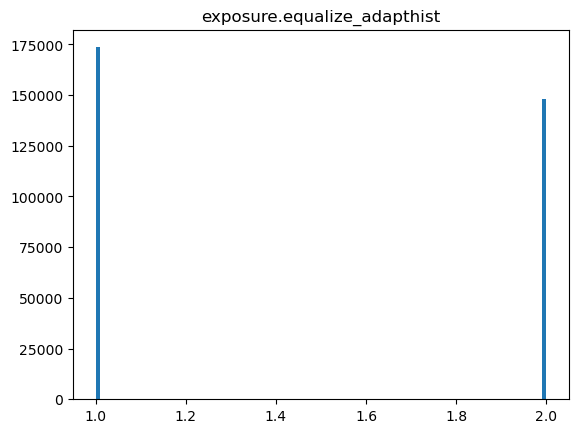

In [11]:
#Based on the equalised histogram we can add information for the markers
#first condition
markers[(eq_img <= 0.75) & (eq_img > 0.2)] = 1
markers[(eq_img > 0.75) & (eq_img < 0.99)] = 2
plt.imshow(markers)
plt.colorbar()
plt.show()

plt.hist(markers.flat, bins=100, range=(1., 2))
plt.title('exposure.equalize_adapthist')
plt.show()

## Segmentation using random walker

[1 2]


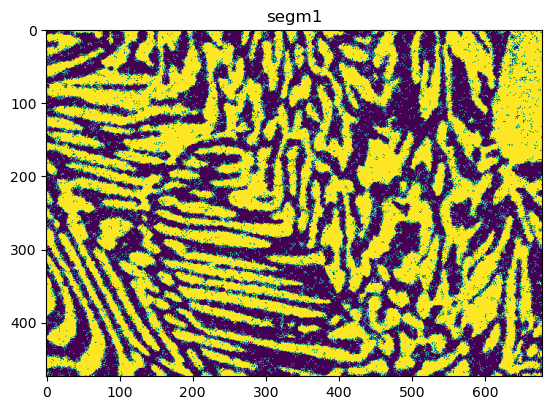

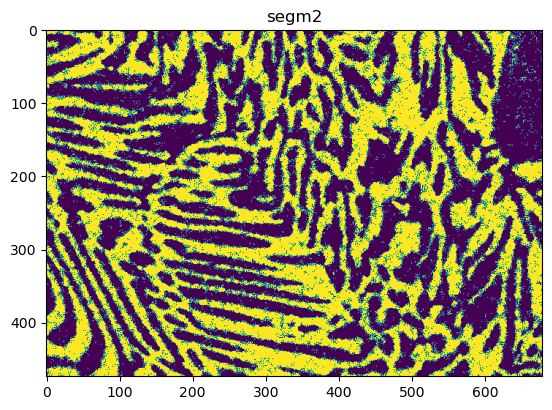

In [12]:
from skimage.segmentation import random_walker
# Run random walker algorithm
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker
labels = random_walker(eq_img, markers, beta=10, mode='bf')

#uniqued labels
print(np.unique(labels))

#two segments
segm1 = (labels == 1)
segm2 = (labels == 2)

plt.imshow(segm1)
plt.title('segm1')
plt.show()
plt.imshow(segm2)
plt.title('segm2')
plt.show()

### Segmentation 

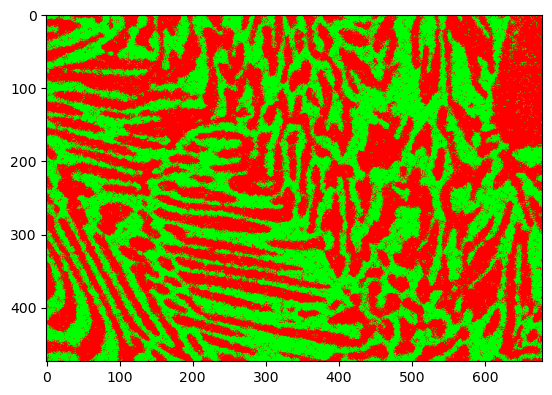

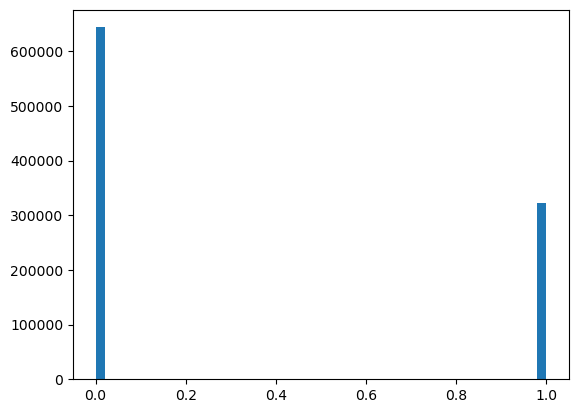

In [13]:
#nothing but denoise img size but blank
all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) 
#asign color for each segment
all_segments[segm1] = (1,0,0) #red
all_segments[segm2] = (0,1,0) #green

#plot the result
plt.imshow(all_segments)
plt.show()

plt.hist(all_segments.flat, bins=50, range=(0., 1))
plt.show()

## clean the segmented image

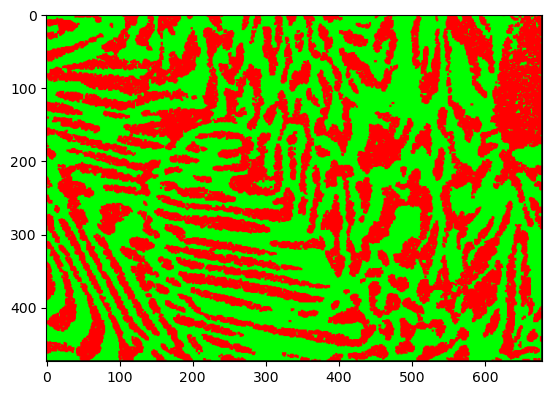

In [14]:
from scipy import ndimage as nd

segm1_closed = nd.binary_closing(segm1, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2, np.ones((3,3)))

all_segments_cleaned = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) 

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)

plt.imshow(all_segments_cleaned) 
plt.show()
plt.imsave("images/random_walker.jpg", all_segments_cleaned)

# Example 2:

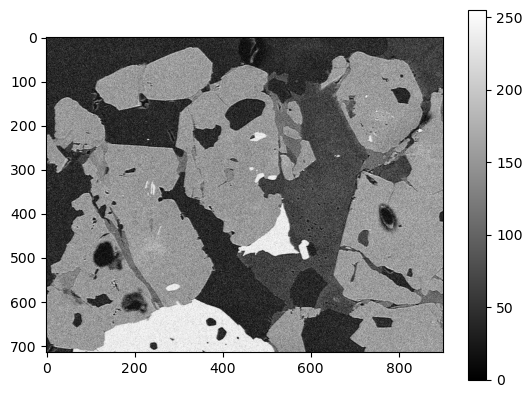

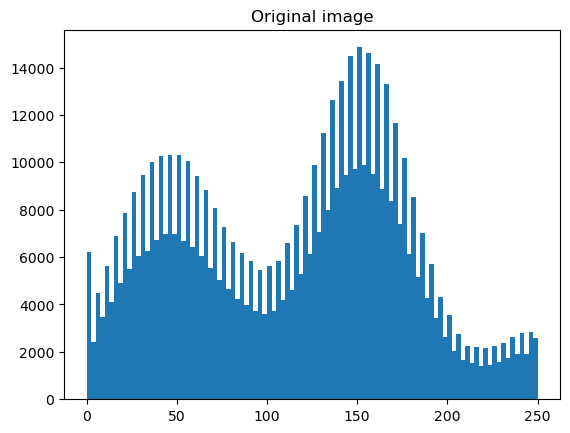

In [15]:
img = io.imread("images/BSE_Google_noisy.jpg")
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(img.flat, bins=100, range=(0, 250)) 
plt.title('Original image')

plt.show()

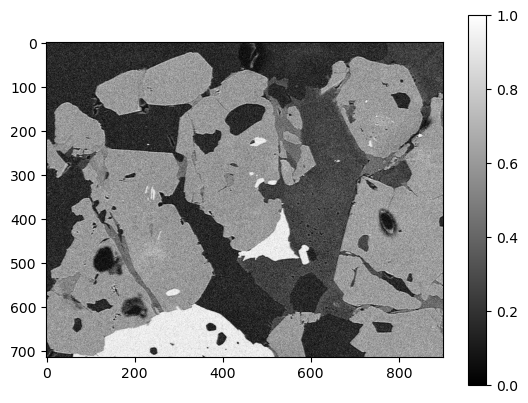

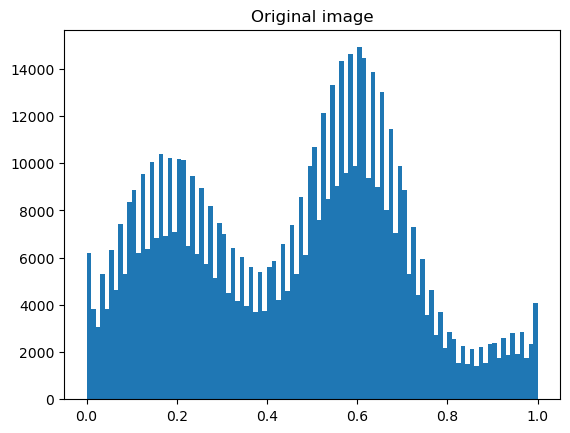

In [16]:
img = img_as_float(io.imread("images/BSE_Google_noisy.jpg"))
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(img.flat, bins=100, range=(0, 1)) 
plt.title('Original image')

plt.show()

## Denoising

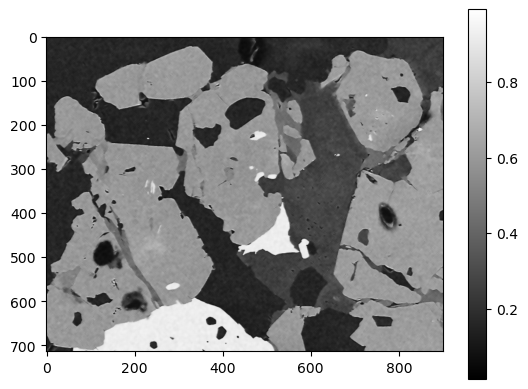

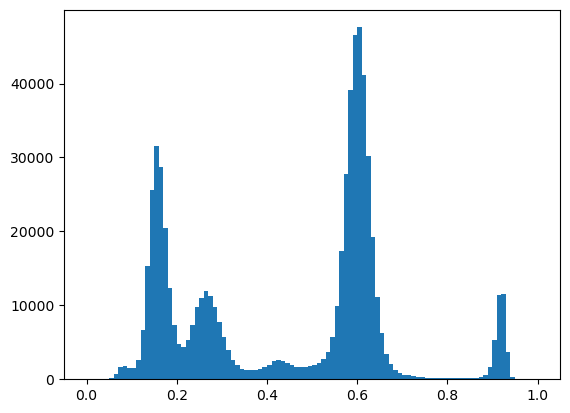

In [17]:
#Denoising
from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3, multichannel=True)
plt.imshow(denoise_img, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(denoise_img.flat, bins=100, range=(0, 1)) 
plt.show()
# Much better histogram and now we can see two separate peaks. 
#Still close enough so cannot use histogram based segmentation.
#Let us see if we can get any better by some preprocessing.

## histogram equalization

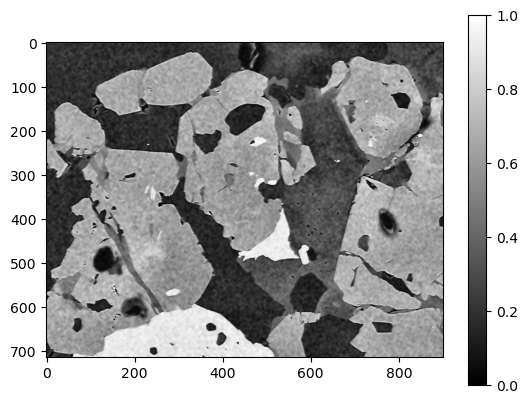

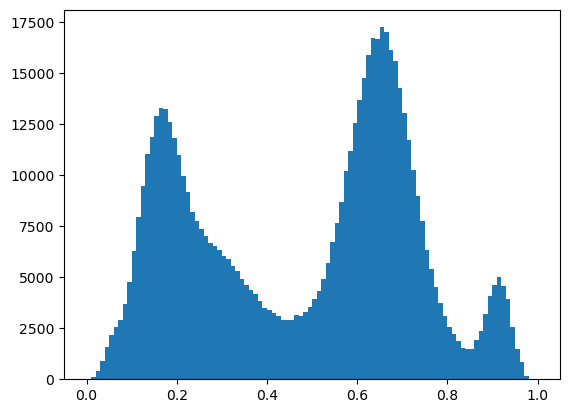

In [18]:
#Let's try histogram equalization
from skimage import exposure   #Contains functions for hist. equalization

#eq_img = exposure.equalize_hist(denoise_img)
eq_img = exposure.equalize_adapthist(denoise_img)
plt.imshow(eq_img, cmap='gray')
plt.colorbar()
plt.show()
plt.hist(eq_img.flat, bins=100, range=(0., 1))
plt.show()

## Segmentation using random walker algorithm
more reference:
https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker

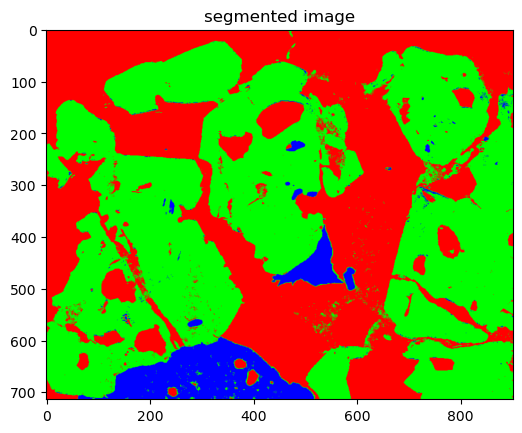

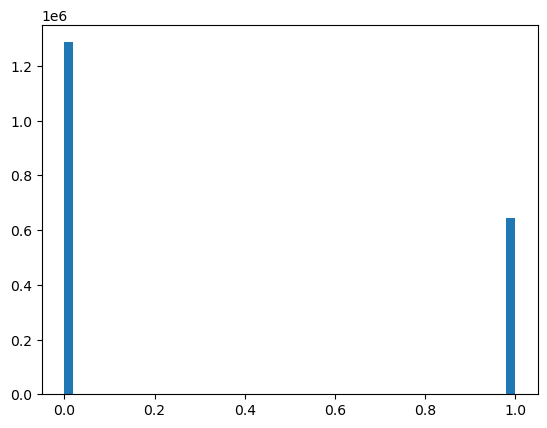

In [19]:
#Not any better. Let us stretch the hoistogram between 0.7 and 0.95

# The range of the binary image spans over (0, 1).
# For markers, let us include all between each peak.
markers = np.zeros(img.shape, dtype=np.uint)

markers[(eq_img < 0.45) & (eq_img > 0.01)] = 1
markers[(eq_img > 0.45) & (eq_img < 0.84)] = 2
markers[(eq_img > 0.85) & (eq_img < 0.99)] = 3

from skimage.segmentation import random_walker
# Run random walker algorithm
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker
labels = random_walker(eq_img, markers, beta=10, mode='bf')
plt.imsave("images/markers.jpg", markers)
segm1 = (labels == 1)
segm2 = (labels == 2)
segm3 = (labels == 3)
all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)
all_segments[segm3] = (0,0,1)

plt.imshow(all_segments)
plt.title('segmented image')
plt.show()

plt.hist(all_segments.flat, bins=50, range=(0., 1))
plt.show()

## Clean the segmented image

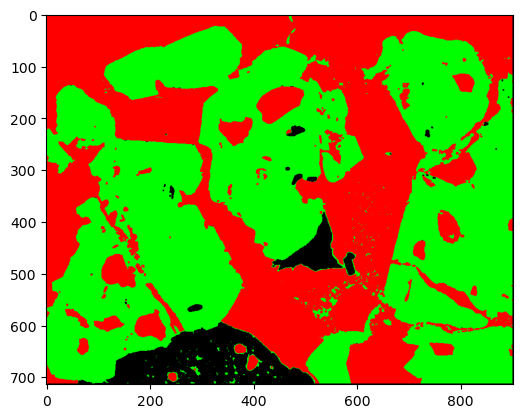

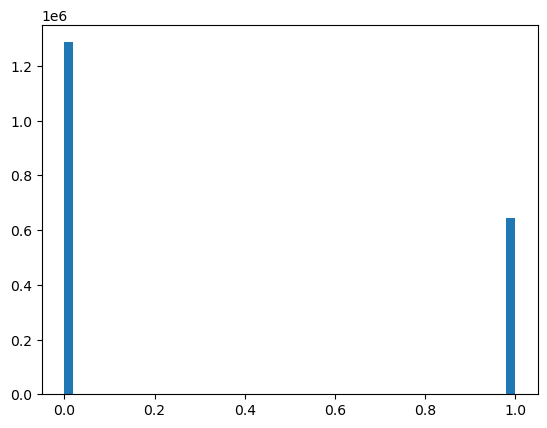

In [20]:
from scipy import ndimage as nd

segm1_closed = nd.binary_closing(segm1, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2, np.ones((3,3)))

all_segments_cleaned = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) 

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)

plt.imshow(all_segments_cleaned) 
plt.show()
plt.imsave("images/random_walker.jpg", all_segments_cleaned)

plt.hist(all_segments.flat, bins=50, range=(0., 1))
plt.show()

In [ ]:
#Reference: Python for Microscopists by DigitalSreeni - The best channel in my opinion.

# https://www.youtube.com/watch?v=6P8YhJa2V6o